In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, r2_score


In [8]:
# Load dataset
df = pd.read_csv(r"C:/Users/vaishnavidimble2601/Desktop/Unclean/unclean_customer_data.csv")


# Drop missing values
df = df.dropna()

# Encode categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col].astype(str))

# Preview cleaned data
df.head()


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Transaction_Amount
0,8270,31.0,75851.592212,77.104268,17,129.724190
1,1860,48.0,44460.183764,61.349076,25,91.479265
2,6390,17.0,43677.755605,22.589956,9,130.573812
3,6191,34.0,48666.812544,82.069525,0,72.395846
4,6734,44.0,46080.334029,65.076915,3,156.399077


In [9]:
# Set target column (you can manually change it)
target_col = "Transaction_Amount"  # Example: try "Gender" for classification

X = df.drop(columns=[target_col])
y = df[target_col]

# Detect task type
task_type = "classification" if y.nunique() < 20 and y.dtype in ['int64', 'int32'] else "regression"
print("Detected Task Type:", task_type.capitalize())


Detected Task Type: Regression


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = RandomForestClassifier() if task_type == "classification" else RandomForestRegressor()
model.fit(X_train, y_train)
print("✅ Model trained successfully!")

✅ Model trained successfully!


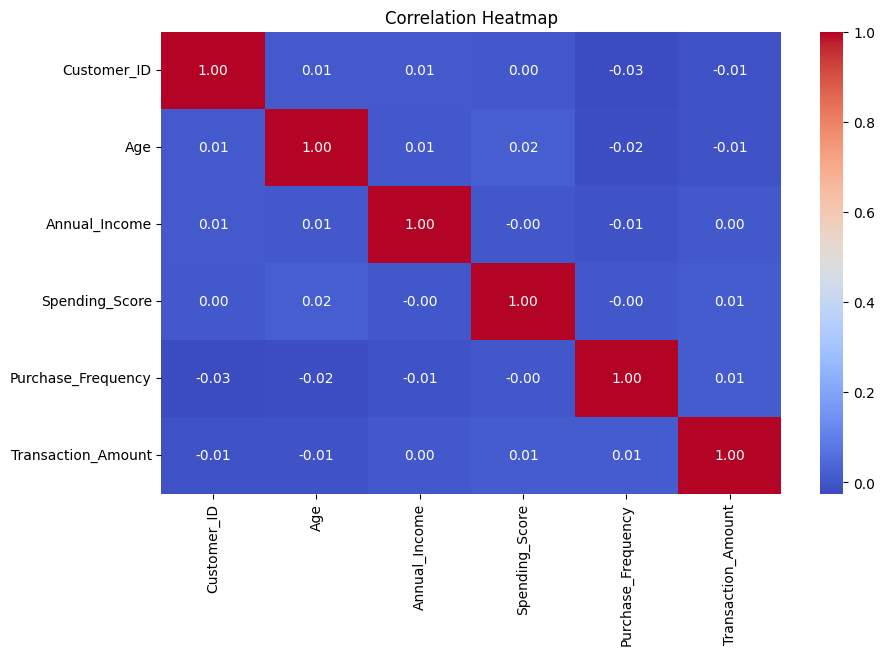

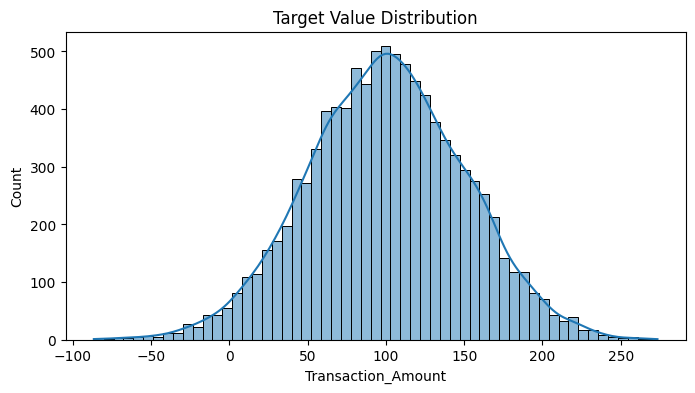

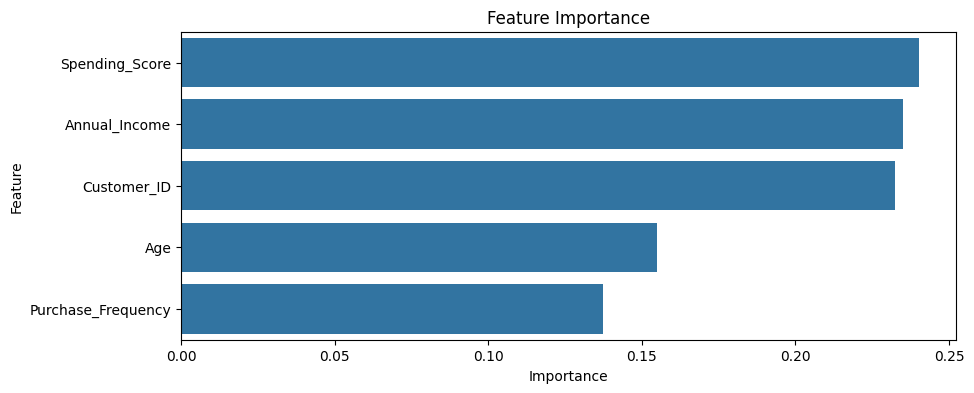

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Target distribution
if task_type == "classification":
    y.value_counts().plot(kind='bar', title="Target Class Distribution")
    plt.xlabel("Class")
    plt.ylabel("Count")
    plt.show()
else:
    plt.figure(figsize=(8, 4))
    sns.histplot(y, kde=True)
    plt.title("Target Value Distribution")
    plt.show()

# Feature importance
importances = model.feature_importances_
feat_imp_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 4))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df)
plt.title("Feature Importance")
plt.show()


📈 Actual vs Predicted:


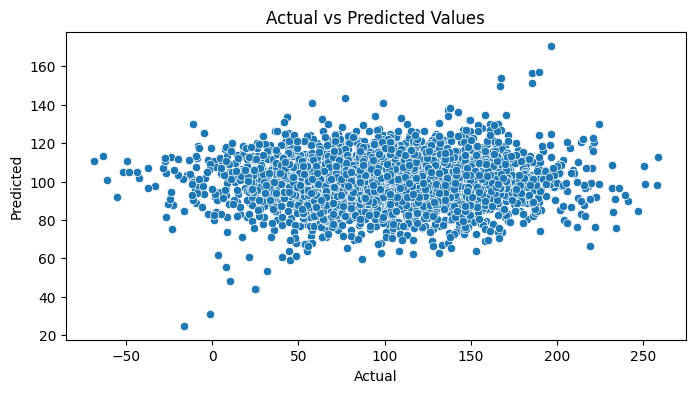

Mean Squared Error: 2564.645275573635
R² Score: -0.04076126664806723


In [14]:
y_pred = model.predict(X_test)

if task_type == "classification":
    print("📊 Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.show()

    print("\n📄 Classification Report:")
    print(classification_report(y_test, y_pred))
else:
    print("📈 Actual vs Predicted:")
    plt.figure(figsize=(8, 4))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title("Actual vs Predicted Values")
    plt.show()

    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R² Score:", r2_score(y_test, y_pred))


In [15]:
# Change this to either X_train or X_test
data_to_predict = X_test  # Or X_train

# Predict
preds = model.predict(data_to_predict)

# View predictions
results = data_to_predict.copy()
results["Prediction"] = preds
results.head()


,Customer_ID,Age,Annual_Income,Spending_Score,Purchase_Frequency,Prediction
9152,4897,30.0,36395.861337,91.762516,1,83.809319
8484,4367,37.0,48707.208335,61.920942,16,88.161635
1782,4610,46.0,62213.489219,79.314966,16,111.858868
4690,5386,33.0,59764.147538,38.829909,9,110.061978
40,8513,45.0,49161.818683,89.944239,12,101.327206
